# Лабораторная работа 4

---
Ал-Обайди Лина Моханадовна



In [ ]:
import pandas as pd

data=pd.read_csv('web_traffic.tsv', delimiter='\t', names=['hours', 'n_requests'])

input_var='hours'
targed_var='n_requests'
print(data['n_requests'][742])

hours_data=data[input_var]
requests_data=data[targed_var]



4881.0


In [ ]:
import numpy as np
from numpy import isnan

from pandas import notna


# TODO: Использовать функцию notna()
hours_data = hours_data[pd.notna(requests_data)]
requests_data = requests_data[pd.notna(requests_data)]





print(hours_data, requests_data)

0        1
2        3
3        4
4        5
5        6
      ... 
738    739
739    740
740    741
741    742
742    743
Name: hours, Length: 735, dtype: int64 0      2272.0
2      1386.0
3      1365.0
4      1488.0
5      1337.0
        ...  
738    4970.0
739    4813.0
740    5392.0
741    5906.0
742    4881.0
Name: n_requests, Length: 735, dtype: float64


In [ ]:
# %matplotlib inline

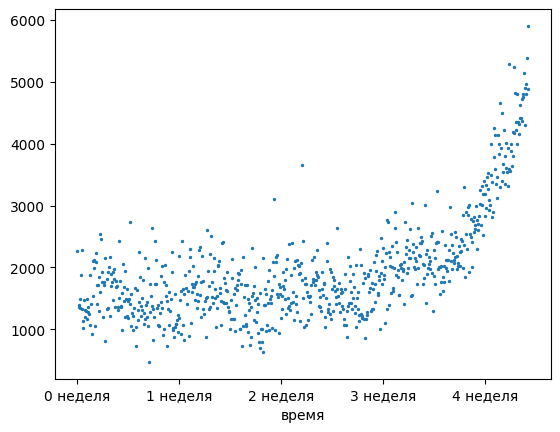

In [ ]:
# Визуализация

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

plt.autoscale(tight=False)

plt.show()

In [ ]:
f2p, residuals, rank, sv, rcond = np.polyfit(hours_data, requests_data, 3, full=True)

print("Параметры модели {}".format(f2p))

Параметры модели [ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]


Таким образом, наша модель будет выглядеть следующим образом:
```
f(x) = 2.59619213 * x + 989.02487106
```

Посчитаем ошибку нашей модели:

In [ ]:
from sklearn.metrics import r2_score
fx = np.poly1d(f2p)
r2_array = []  # здесь будут храниться значения точности
r2_array.append(r2_score(requests_data,  fx(hours_data)))
rmse = mean_squared_error(requests_data, fx(hours_data), squared=False)
mse = mean_squared_error(requests_data,  fx(hours_data), squared=True)

print(r2_array, mse, rmse)

NameError: name 'mean_squared_error' is not defined

In [ ]:
# Визуализация

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

# отобразим модель #1
f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f2y = fx(f2x)
plt.plot(f2x, f2y, linewidth=1.0, color='red')

plt.autoscale(tight=False)

plt.show()

Лабораторная работа 4.5

# Лабораторная работа 5

In [ ]:
train_border = 3.5
final_border = 4.2

train_data  = int(train_border * 7 * 24) # 588
final_border = int(final_border * 7 * 24)

# print(divider)
# train set
hours_data_1, requests_data_1 = hours_data[train_data:final_border], requests_data[train_data:final_border]
# test set
hours_data_2, requests_data_2 = hours_data[final_border:], requests_data[final_border:]
print(requests_data_1.shape)
print(requests_data_2.shape)

# print(588+84)

In [ ]:
f2p_1, residuals_1, rank_1, sv_1, rcond_1 = np.polyfit(hours_data_1, requests_data_1, 3, full=True)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
fx_1 = np.poly1d(f2p_1)
r2_array_1 = []  # здесь будут храниться значения точности
r2_array_1.append(r2_score(requests_data_2, fx_1(hours_data_2)))
rmse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=False)
mse = mean_squared_error(requests_data_2,fx_1(hours_data_2), squared=True)
print(r2_array_1, mse, rmse)

При степени полинома 3, ```r_2 = 0.174``` при разбивке данных без учета очевидного тренда (начиная с 3.5 недели).

При степени полинома 3, ```r_2 = 0.757``` при разбивке данных c учетом очевидного тренда (начиная с 3.5 недели).

In [ ]:
# Визуализация

import matplotlib.pyplot as plt

plt.scatter(hours_data, requests_data, s=2)
plt.xlabel('время')

plt.xticks([w*7*24 for w in range(6)],["%i неделя" %w for w in range(6)])

# отобразим модель #1
f2x = np.linspace(0, hours_data[len(hours_data)], len(hours_data))
f2y = fx(f2x)
plt.plot(f2x, f2y, linewidth=1.0, color='red')

plt.autoscale(tight=False)

plt.show()

# Ответить развернуто и пояснить ответ на вопрос ниже:

```Какая модель для гипотезы, при которой весь набор данных представляет собой два диапазона значений (например, от 0 недели до 3.5 недели и с 3.5 недели до конца или какой-то другой диапазон/граница), подходит наилучшим образом (дает наименьшую ошибку)?```

Аргументировать ответ метриками ошибок (MSE, RMSE, MAE).

Модель, в данном случае, это степень полинома.

Изменится ли ответ, если предположить, что степень полинома 20 плохо подходит для тестовых данных потому что ошибка получаемая для тестовых данных на много порядков больше, чем ошибка для тренировочного набора данных.

Если мы разделим данные на два диапазона:

In [ ]:
divider = int(3.5*7*24)
divider2 = int(4.1*7*24)

hours_data_1, requests_data_1 = hours_data[:divider], requests_data[:divider]
hours_data_2, requests_data_2 = hours_data[divider:divider2], requests_data[divider:divider2]

hours_data_test, requests_data_test = hours_data[divider2:], requests_data[divider2:]

print(requests_data_1.shape, requests_data_2.shape, requests_data_test.shape)

и обучим модель 20 степени полинома на данных, тренд которых мы предположим наиболее оптимальным для будущих данных (с 3.5 до 4.1 недели):

In [ ]:
f20p, residuals, rank, sv, rcond = np.polyfit(hours_data_2, requests_data_2, 20, full=True)
f20 = np.poly1d(f20p)
rmse_1 = mean_squared_error(requests_data_2,f20(hours_data_2), squared=False)
rmse_2 = mean_squared_error(requests_data_test,f20(hours_data_test), squared=False)
print(f"RMSE (для данных c 3.5 недели по 4.1 недели)= {rmse:.5}")
print(f"RMSE (только для данных с 3.5 недели)= {rmse_2:.5}")

Посчитав ошибку RMSE с использованием обученной модели степени полинома 20 на данных начиная с 3.5 недели, мы получим огромную ошибку на много порядков превышающую ошибку на тренировочной выборке.

```Какая степень полинома дает там ошибку меньшую или примерно равную ошибке на тренировочном датасете?```. Поясните свой ответ на основе данных.